#DATE TIME SERIES CONCEPTS 

In [1]:
import pathlib
import pandas as pd
import numpy as np

BASE_DIR = pathlib.Path().resolve().parent
pandas = BASE_DIR / "pandas_deep_dive"
csv1 = pandas / "ETH_1h.csv"

print(BASE_DIR, csv1.exists())

C:\Users\vipin\python_projects\data_analysis True


In [2]:
df = pd.read_csv(csv1)
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 03-PM,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 02-PM,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 01-PM,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12-PM,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11-AM,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [3]:
df.shape

(23674, 7)

In [4]:
df.loc[1, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [6]:
# Let's convert it to the datetime 
df['Date'] = pd.to_datetime(df['Date'])
# This is not going to work for us because our format structure for date is not proper this may work for you 
# So now we have to change the structure for the datetime

ParserError: Unknown string format: 2020-03-13 08-PM

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %I-%p") 
# Now this same thing we can also do while reading the pdf lets see it below

In [12]:
d_parser = lambda x : pd.datetime.strptime(x, "%Y-%m-%d %I-%p")
df2 = pd.read_csv(csv1, parse_dates=['Date'], date_parser=d_parser)
df2

C:\Users\vipin\AppData\Local\Temp\ipykernel_21536\196322021.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x : pd.datetime.strptime(x, "%Y-%m-%d %I-%p")


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [10]:
df.loc[1, 'Date'].day_name()

'Friday'

In [16]:
# The way we use the str class on our objects earlier similarly if we want to access the date column than we have to use dt
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [17]:
df['Day_Of_Week'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,Day_Of_Week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


Lets go through the way to find the max and min date and also the difference between them

In [18]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [20]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [21]:
time_gap = df['Date'].max() - df['Date'].min()
time_gap

Timedelta('986 days 09:00:00')

#Filtering the time date

In [33]:
# filter_date = (df['Date'] > "2019") & (df['Date'] < "2021")
# Above we are using the string format and we can also go with the datetime
from datetime import datetime
filter_date = (df['Date'] >= datetime(2019, 8, 1)) & (df['Date'] < datetime(2020,5,1))
df.loc[filter_date]

,Date,Symbol,Open,High,Low,Close,Volume,Day_Of_Week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
5416,2019-08-01 04:00:00,ETHUSD,214.16,214.28,213.05,213.69,363824.39,Thursday
5417,2019-08-01 03:00:00,ETHUSD,214.60,214.85,213.64,214.16,609118.56,Thursday
5418,2019-08-01 02:00:00,ETHUSD,214.00,214.61,213.05,214.60,723984.48,Thursday
5419,2019-08-01 01:00:00,ETHUSD,216.30,216.93,211.00,214.00,1233868.19,Thursday


In [34]:
# This is another way to do the same thing
filter_date = (df['Date'] >= pd.to_datetime("2019-8-1")) & (df['Date'] < pd.to_datetime("2020-5-1"))
df.loc[filter_date]

,Date,Symbol,Open,High,Low,Close,Volume,Day_Of_Week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
5416,2019-08-01 04:00:00,ETHUSD,214.16,214.28,213.05,213.69,363824.39,Thursday
5417,2019-08-01 03:00:00,ETHUSD,214.60,214.85,213.64,214.16,609118.56,Thursday
5418,2019-08-01 02:00:00,ETHUSD,214.00,214.61,213.05,214.60,723984.48,Thursday
5419,2019-08-01 01:00:00,ETHUSD,216.30,216.93,211.00,214.00,1233868.19,Thursday


we can also set the Date column as our index and then perform this filtering

In [37]:
df.set_index("Date", inplace=True)

In [38]:
df['2019']

C:\Users\vipin\AppData\Local\Temp\ipykernel_21536\1813439174.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019']


,Symbol,Open,High,Low,Close,Volume,Day_Of_Week
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [39]:
# Let's perform the slicing here
df['2019-01':'2019-04']

,Symbol,Open,High,Low,Close,Volume,Day_Of_Week
Date,,,,,,,
2019-04-30 23:00:00,ETHUSD,160.45,160.62,159.61,160.40,712852.31,Tuesday
2019-04-30 22:00:00,ETHUSD,157.61,161.20,157.56,160.45,2515387.20,Tuesday
2019-04-30 21:00:00,ETHUSD,156.43,158.06,156.19,157.61,746770.09,Tuesday
2019-04-30 20:00:00,ETHUSD,156.13,156.91,155.76,156.43,468094.79,Tuesday
2019-04-30 19:00:00,ETHUSD,156.65,156.82,156.01,156.13,428267.77,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [41]:
# We can also get the mean of the close column for this data range
df['2019-01':'2019-04']['Close'].mean()
# But this data is with respect to the hourly basis

138.1717638888889

In [44]:
# If we have a look at it we find that it is on the hourly basis and we need the max for this day
df['2019-01-01']['Close']

C:\Users\vipin\AppData\Local\Temp\ipykernel_21536\5490439.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-01-01']['Close']


Date
2019-01-01 23:00:00    139.75
2019-01-01 22:00:00    137.98
2019-01-01 21:00:00    137.71
2019-01-01 20:00:00    138.21
2019-01-01 19:00:00    136.00
2019-01-01 18:00:00    132.34
2019-01-01 17:00:00    133.10
2019-01-01 16:00:00    133.36
2019-01-01 15:00:00    133.06
2019-01-01 14:00:00    133.81
2019-01-01 13:00:00    134.65
2019-01-01 12:00:00    134.45
2019-01-01 11:00:00    133.75
2019-01-01 10:00:00    133.68
2019-01-01 09:00:00    133.58
2019-01-01 08:00:00    134.60
2019-01-01 07:00:00    133.25
2019-01-01 06:00:00    133.19
2019-01-01 05:00:00    132.48
2019-01-01 04:00:00    131.96
2019-01-01 03:00:00    130.75
2019-01-01 02:00:00    130.06
2019-01-01 01:00:00    130.79
2019-01-01 00:00:00    131.62
Name: Close, dtype: float64

In [47]:
df['2019-01-01']['Close'].max()

C:\Users\vipin\AppData\Local\Temp\ipykernel_21536\4129017974.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-01-01']['Close'].max()


139.75

In [50]:
high_close = df['Close'].resample('D').max()
#  As you can see this now it is giving us the max value for each day. In the resample "D" means Day we can also select "W", etc

In [51]:
high_close['2019-01-01'] #YOu will notice that it is matching with the above high value which we found

139.75

Let's try to plot all these data using the #MATPLOTIB

In [53]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

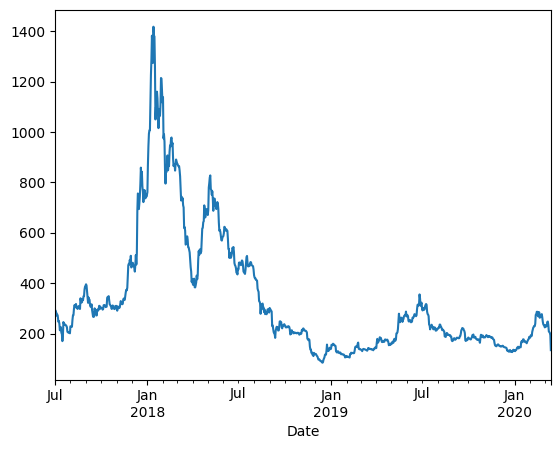

In [54]:
high_close.plot()

Below is the line that will apply the resample on the full database and also we are apply different aggregating functions on different columns

In [56]:
df.resample("W").agg({"Close":"mean", "High":"max", "Low":"min", "Volume":"sum"})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
